<a href="https://colab.research.google.com/github/Vignesh-S-Go/Prodigy_DS_05/blob/main/Prodigy_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload CSV file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Americaacc.csv to Americaacc.csv


In [3]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display first few rows

In [4]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#🔍 Basic Information

In [5]:
# Check basic info
data.info()

# Check for missing values
data.isnull().sum()

# Check dataset shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

#📊 Accident Severity Distribution

/tmp/ipython-input-6-3933764302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident_severity', data=data, palette='Set2')


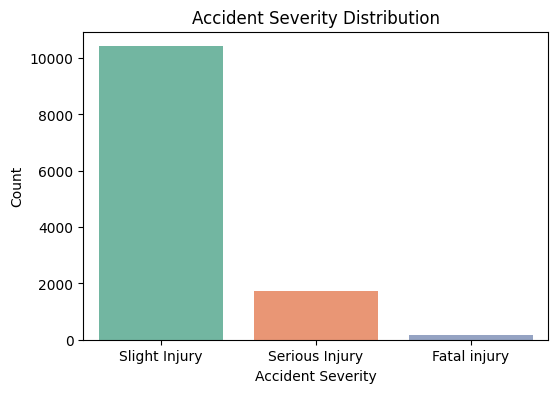

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Accident_severity', data=data, palette='Set2')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


#⏰ Accidents by Day of the Week

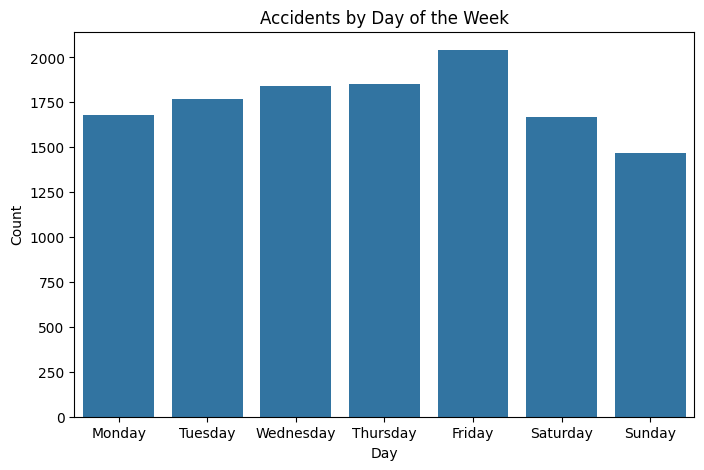

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Day_of_week', data=data, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Accidents by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()


#🕑 Accidents by Time of Day (Created from Time Column)

/tmp/ipython-input-8-643312794.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour


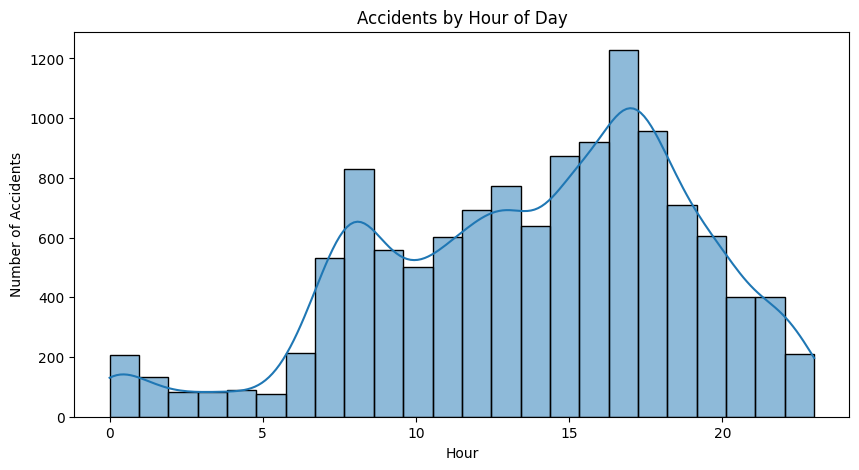

In [8]:

data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

plt.figure(figsize=(10,5))
sns.histplot(data['Hour'].dropna(), bins=24, kde=True)
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.show()


#🚘 Accident Causes

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='Cause_of_accident', data=data, order=data['Cause_of_accident'].value_counts().iloc[:10].index, palette='coolwarm')
plt.title('Top 10 Causes of Accidents')
plt.xlabel('Count')
plt.ylabel('Cause of Accident')
plt.show()


#👥 Accidents by Driver Experience

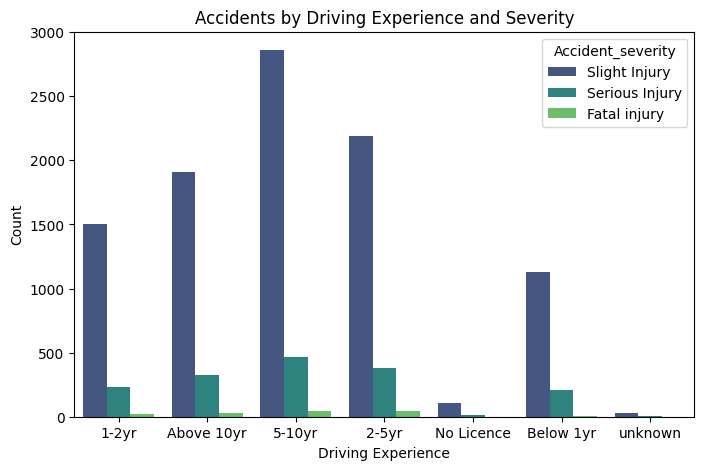

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Driving_experience', hue='Accident_severity', data=data, palette='viridis')
plt.title('Accidents by Driving Experience and Severity')
plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.show()


#🧑‍🤝‍🧑 Accidents by Age Band of Driver

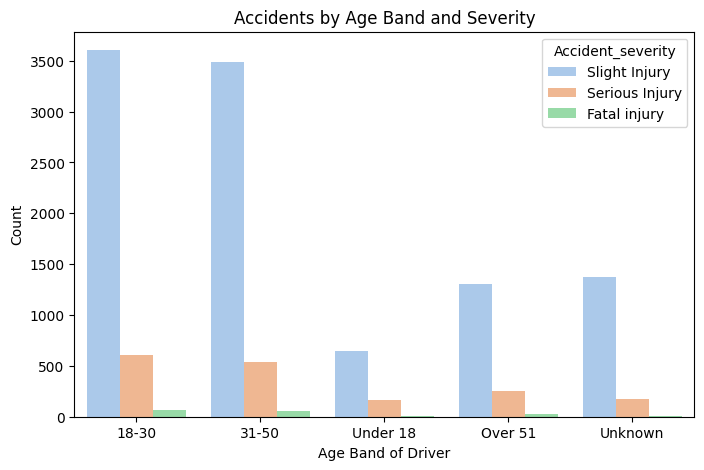

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=data, palette='pastel')
plt.title('Accidents by Age Band and Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.show()

